<h1 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: center;color: #333;">Enhancing Hotel Reservation Management: A Data Analysis Report</h1>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Introduction:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>Identifying variables influencing hotel reservation cancellations</li>
  <li>Improving the hotel reservation process for enhanced guest experiences</li>
  <li>Assisting hotels in data-driven pricing and promotional decisions</li>
</ul>
<p style="font-family: Arial, sans-serif; font-size: 16px; text-align: justify; color: #555;">This data analysis report aims to provide insights into the factors affecting hotel reservation cancellations, propose strategies for optimizing the reservation process, and outline how data analysis can support hotels in making effective pricing and promotional decisions. By leveraging data-driven approaches, hotel managers can enhance revenue generation and guest satisfaction, ultimately driving business growth.</p>
<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Hypothesis:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>More cancellations occures when price is higher</li>
  <li>The majority of the cancellations are coming from offline clients</li>
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Importing Data:</h2>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import iplot,init_notebook_mode,plot
# from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

%matplotlib inline

In [52]:
bookings = pd.read_csv("D:/DataScience/Data/hotel_bookings.csv")
bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Data Informations:</h2>

In [4]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
bookings.shape

(119390, 32)

In [6]:
bookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Data Cleaning and Structuring:</h2>

In [7]:
# Missing values table
def missing_values_table(df):
        # Getting total missing values
        mis_val = df.isnull().sum()
        
        # Calculating the percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # New table with both missing values and the percentage of missing values
        mis_val_tab = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        ren_mis_val_table_columns = mis_val_tab.rename(columns = {0 : 'Missing Values', 1 : '% of Total Missing Values'})
        
        # Sort the table in descending order by percentage of missing values
        ren_mis_val_table_columns = ren_mis_val_table_columns[ren_mis_val_table_columns.iloc[:,1] != 0].sort_values(
        '% of Total Missing Values', ascending=False).round(1)
        
        # Printing some summary 
        print ("\033[1mThe dataframe has total " + str(df.shape[1]) + " columns.\033[0m \n")
        print ("\033[1mThere are " 
               + str(ren_mis_val_table_columns.shape[0]) + " columns that have missing values.\033[0m \n")
        
        # Return the dataframe with missing info
        return ren_mis_val_table_columns

In [8]:
missing_val = missing_values_table(bookings)
missing_val.style.background_gradient(cmap='Oranges')

The dataframe has total 32 columns. 

There are 4 columns that have missing values. 



,Missing Values,% of Total Missing Values
company,112593,94.300000
agent,16340,13.700000
country,488,0.400000
children,4,0.000000


In [9]:
# Undefined and Empty values table
def find_columns_with_undefined(dataframe):
    oColumns=['Column', 'Count', 'Percentage']
    columns_with_undefined = pd.DataFrame(columns=oColumns)
    
    for column in dataframe.columns:
        undefined_count = dataframe[column].isin(["Undefined", "undefined", "UnDefined", "UNDEFINED",""]).sum()
        undefined_percentage = (undefined_count / len(dataframe[column])) * 100
        
        if undefined_count > 0:
            columns_with_undefined = pd.concat([columns_with_undefined, pd.DataFrame([[column, undefined_count, undefined_percentage]], columns=oColumns)])
    
    # Printing summary information
    print("\033[1mThe dataframe has a total of " + str(dataframe.shape[1]) + " columns.\033[0m \n")
    print("\033[1mThere are " + str(len(columns_with_undefined)) + " columns that have values which are 'Undefined' and/or 'Empty'.\033[0m \n")
    
    # Organizing  the output DataFrame
    output_table = columns_with_undefined.sort_values(by='Percentage', ascending=False) \
                                         .reset_index(drop=True) \
                                         .set_index('Column')
    
    return output_table

In [10]:
undefined_columns = find_columns_with_undefined(bookings)
undefined_columns.style.background_gradient(cmap='Oranges')

The dataframe has a total of 32 columns. 

There are 3 columns that have values which are 'Undefined' and/or 'Empty'. 



,Count,Percentage
Column,,
meal,1169,0.979144
distribution_channel,5,0.004188
market_segment,2,0.001675


In [11]:
bookings["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [12]:
bookings["distribution_channel"].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [13]:
bookings["market_segment"].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [14]:
bookings["agent"]

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [15]:
bookings["country"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [16]:
# Convert 'reservation_status_date' column to datetime format
bookings['reservation_status_date'] = pd.to_datetime(bookings['reservation_status_date'])

# Replace missing values:
# agent: If no agency is given, booking was most likely made without one.
# children: Same, If no children is given, booking was most likely made without one.
nan_replacements = {"children": 0,"agent": 0}
bookings = bookings.fillna(nan_replacements)

# Dropping rows with null values in the 'country' column
bookings = bookings.dropna(subset=['country'])

# I am dropping rows where adults = 0, as it indicates no guests,
# since children and babies cannot book hotels without adults accompanying them
bookings = bookings[bookings['adults'] != 0]

# The following are hotel meal codes commonly used in the industry:

#     BB: Bed and Breakfast. This code indicates that the room rate includes breakfast for the guests.
#     FB: Full Board. This code signifies that the room rate includes three meals a day: breakfast, lunch, and dinner.
#     HB: Half Board. This code indicates that the room rate includes two meals a day: typically breakfast and either lunch or dinner.
#     SC: Self-Catering. This code implies that guests are responsible for their own meals and the room rate only covers the accommodation.

# These meal codes are often used by hotels and travel agencies to provide a quick reference regarding the type of meal arrangements included in a particular room rate.
# "meal" contains values "Undefined", which is equal to SC.
bookings["meal"].replace("Undefined", "SC", inplace=True)

# Replace 'Undefined' values in the 'Distribution Channel' column with the most common value
most_common_channel = bookings.loc[bookings['distribution_channel'] != 'Undefined', 'distribution_channel'].mode()[0]
bookings.loc[bookings['distribution_channel'] == 'Undefined', 'distribution_channel'] = most_common_channel

# Replace 'Undefined' values in the 'Market Segment' column with the most common value
most_common_segment = bookings.loc[bookings['market_segment'] != 'Undefined', 'market_segment'].mode()[0]
bookings.loc[bookings['market_segment'] == 'Undefined', 'market_segment'] = most_common_segment

#Due to a substantial 94% data deficiency regarding the Company, we have chosen to promptly eliminate the table.
bookings.drop(["company"],axis=1, inplace=True)

In [17]:
bookings.shape

(118509, 31)

In [18]:
bookings["meal"].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [19]:
bookings["distribution_channel"].unique()

array(['Direct', 'Corporate', 'TA/TO', 'GDS'], dtype=object)

In [20]:
bookings["market_segment"].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [21]:
missing_val = missing_values_table(bookings)
missing_val.style.background_gradient(cmap='Oranges')

The dataframe has total 31 columns. 

There are 0 columns that have missing values. 



,Missing Values,% of Total Missing Values


In [22]:
undefined_columns = find_columns_with_undefined(bookings)
undefined_columns.style.background_gradient(cmap='Oranges')

The dataframe has a total of 31 columns. 

There are 0 columns that have values which are 'Undefined' and/or 'Empty'. 



,Count,Percentage
Column,,


In [23]:
bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118509.000000,118509.000000,118509.000000,118509.000000,118509.000000,118509.00000,118509.000000,118509.000000,118509.000000,118509.000000,118509.000000,118509.000000,118509.000000,118509.000000,118509.000000,118509.000000,118509.000000,118509.000000,118509.000000
mean,0.371769,104.359593,2016.157448,27.166046,15.798699,0.92820,2.500764,1.864567,0.100727,0.007949,0.031643,0.087352,0.131847,0.218549,75.072838,2.334945,102.170446,0.062012,0.570936
std,0.483279,106.930664,0.707734,13.583828,8.780575,0.99287,1.889734,0.569534,0.390795,0.097411,0.175049,0.847184,1.486659,0.638487,107.231677,17.649065,50.405437,0.244411,0.792262
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.00000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.00000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.00000,40.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Finding Outliers:</h2>

Text(0.5, 0, 'ADR')

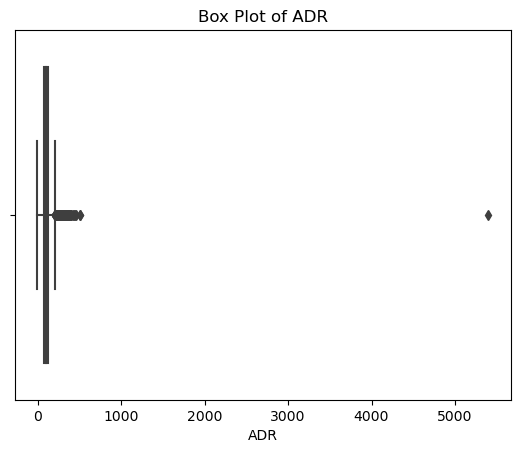

In [24]:
# Create the box plot
sns.boxplot(x=bookings["adr"])

# Set the title and labels
plt.title("Box Plot of ADR")
plt.xlabel("ADR")
# plt.xlim(0, 1000)

In [25]:
bookings = bookings[bookings["adr"]< 5000]

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Checking for duplicate values:</h2>

In [26]:
# Check for duplicates in the entire DataFrame
duplicates = bookings.duplicated()


# Count the number of duplicates
num_duplicates = duplicates.sum()

# Display the duplicated rows
duplicated_rows = bookings[duplicates]
print("Number of duplicates:", num_duplicates)
print("Duplicated rows:")
print(duplicated_rows)

Number of duplicates: 31952
Duplicated rows:
               hotel  is_canceled  lead_time  arrival_date_year  \
5       Resort Hotel            0         14               2015   
22      Resort Hotel            0         72               2015   
43      Resort Hotel            0         70               2015   
138     Resort Hotel            1          5               2015   
200     Resort Hotel            0          0               2015   
...              ...          ...        ...                ...   
119349    City Hotel            0        186               2017   
119352    City Hotel            0         63               2017   
119353    City Hotel            0         63               2017   
119354    City Hotel            0         63               2017   
119373    City Hotel            0        175               2017   

       arrival_date_month  arrival_date_week_number  \
5                    July                        27   
22                   July               

In [27]:
# Remove duplicates in the entire DataFrame
bookings = bookings.drop_duplicates()

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 32px; font-weight: bold; text-align: justify; color: #555;">EDA:</h2>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Reservation Cancellations Status:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>City Hotel</li>
  <li>Resort Hotel </li>
</ul>

In [28]:
import calendar

bookings['reservation_status_month'] =bookings['reservation_status_date'].dt.to_period('M')
# Map month numbers to month names
bookings['reservation_status_month'] = bookings['reservation_status_month'].dt.month.map(lambda x: calendar.month_name[x])
# Define the order of month names
month_order = [calendar.month_name[i] for i in range(1, 13)]
# Convert 'month_name' to categorical data type with custom order
bookings['reservation_status_month'] = pd.Categorical(bookings['reservation_status_month'], categories=month_order, ordered=True)
# Sort DataFrame by 'reservation_status_month'
bookings_sorted = bookings.sort_values(by='reservation_status_month')

In [29]:
resort_bookings = bookings[bookings["hotel"] == "Resort Hotel"]
city_bookings = bookings[bookings["hotel"] == "City Hotel"] 

In [30]:
Total_cancellation_count = bookings["is_canceled"].value_counts()
Total_cancellation_perc = bookings["is_canceled"].value_counts(normalize =True) * 100
# print(f'\033[1mTotal bookings canceled: {Total_cancellation_count[1]} ({Total_cancellation_perc[1]:.2f}%)\033[0m \n')

resort_cancellations_count = resort_bookings["is_canceled"].value_counts()
resort_cancellation_percentage = resort_bookings["is_canceled"].value_counts(normalize =True) * 100
# print(f'\033[1mTotal Resort hotel bookings canceled: {resort_cancellations_count[1]} ({resort_cancellation_percentage[1]:.2f}%)\033[0m \n')


city_cancellations_count = city_bookings["is_canceled"].value_counts()
city_cancellation_percentage = city_bookings["is_canceled"].value_counts(normalize =True) * 100
# print(f'\033[1mTotal City hotel bookings canceled: {city_cancellations_count[1]} ({city_cancellation_percentage[1]:.2f}%)\033[0m \n')

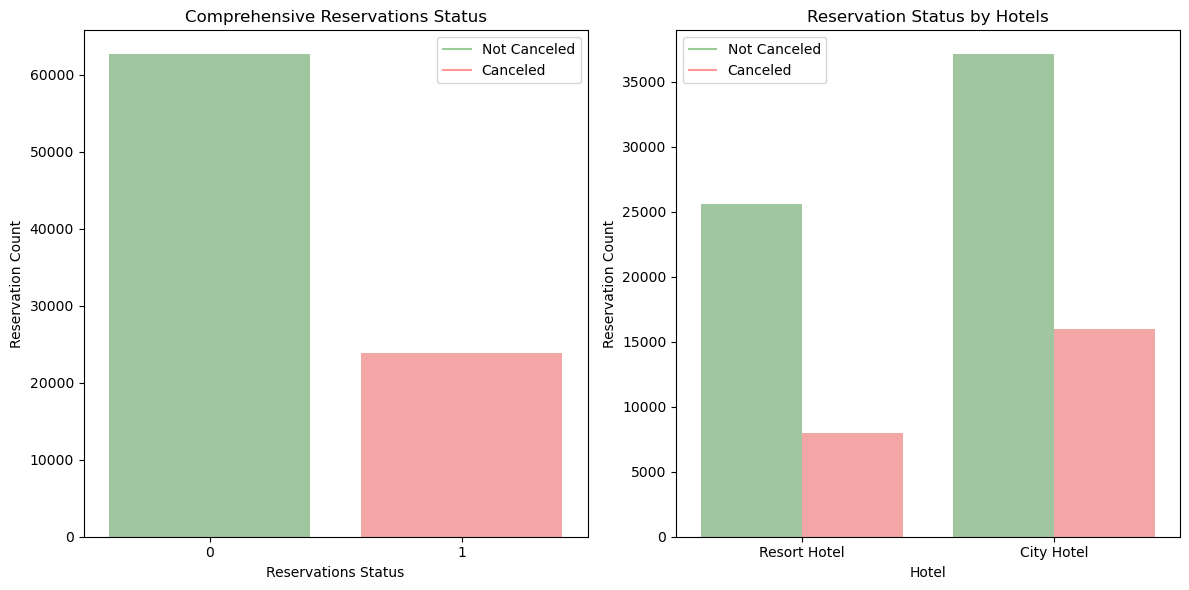

In [31]:
plt.figure(figsize=(12, 6))
# Create custom color palette
colors = [ "#99cc99", "#ff9999"]

# Create custom legend colors
legend_colors = [ "#99cc99", "#ff9999"]
legend_labels = ['Not Canceled', 'Canceled']
custom_legends = []
for i, color in enumerate(legend_colors):
    custom_legends.append(plt.Line2D([], [], color=color, label=legend_labels[i]))
        
# Subplot 1: Countplot
plt.subplot(1, 2, 1)
sns.barplot(x=bookings["is_canceled"].value_counts().index, y=bookings["is_canceled"].value_counts().values, data=bookings, palette=legend_colors)
plt.xlabel('Reservations Status')
plt.ylabel('Reservation Count')
plt.title('Comprehensive Reservations Status')
plt.legend(['not cancelled', 'cancelled'])

# Add custom legend to the plot
plt.legend(handles=custom_legends)

# Subplot 2: Bar plot
plt.subplot(1, 2, 2)
sns.countplot(x='hotel', hue='is_canceled', data=bookings, palette=legend_colors)
plt.xlabel('Hotel')
plt.ylabel('Reservation Count')
plt.title('Reservation Status by Hotels')
plt.legend(['Not Canceled', 'Canceled'])


# Add custom legend to the plot
plt.legend(handles=custom_legends)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

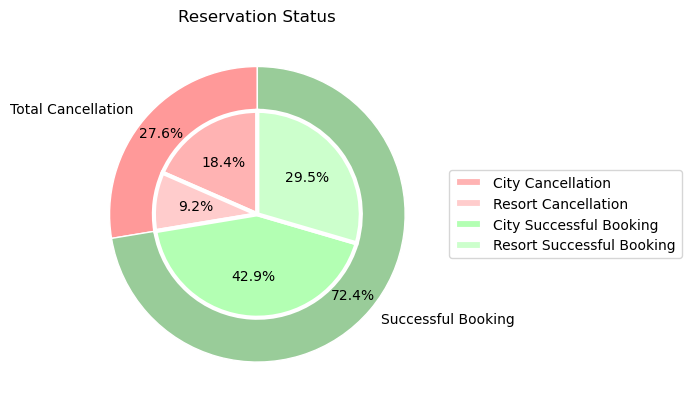

In [32]:
# Define the data
total_cancellation = Total_cancellation_count[1]
city_cancellation = city_cancellations_count[1]
resort_cancellation = resort_cancellations_count[1]
successful_booking = Total_cancellation_count[0]
city_successful_booking = city_cancellations_count[0]
resort_successful_booking = resort_cancellations_count[0]

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 6))  # Set the figure size to 800x600 pixels
labels_outer = ['Total Cancellation', 'Successful Booking']
sizes_outer = [total_cancellation, successful_booking]
labels_inner = ['City Cancellation', 'Resort Cancellation', 'City Successful Booking', 'Resort Successful Booking']
sizes_inner = [city_cancellation, resort_cancellation, city_successful_booking, resort_successful_booking]

# Outer layer
outer_colors = ['#ff9999', '#99cc99']
outer_wedges, outer_text, outer_percent = ax.pie(
    sizes_outer,
    labels=labels_outer,
    colors=outer_colors,
    startangle=90,
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'white'},
    pctdistance=0.85
)

# Inner layer
inner_colors = ['#ffb3b3', '#ffcccc', '#b3ffb3', '#ccffcc']
inner_wedges, inner_text, inner_percent = ax.pie(
    sizes_inner,
    colors=inner_colors,
    radius=0.7,
    startangle=90,
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'white', 'linewidth': 3}  # Increase the linewidth for more whitespace
)

# Add inner labels
plt.setp(inner_text, fontsize=8, weight='bold')

# Add a legend on the right side
legend_labels = ['City Cancellation', 'Resort Cancellation', 'City Successful Booking', 'Resort Successful Booking']
ax.legend(inner_wedges, legend_labels, loc="center left", bbox_to_anchor=(1, 0.5))

# Add a title
plt.title('Reservation Status')

# Set aspect ratio
ax.set(aspect="equal")

# Adjust layout to move the chart to the left
plt.tight_layout(rect=[0, 0, 0.7, 1])

# Display the chart
plt.show()

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Observation:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>Total bookings canceled: 23,898 (27.61%).  </li>
  <li>Significant number of bookings canceled, impacting the hospitality industry.</li>
  <li>City hotels faced a higher cancellation rate of 30.07%. </li>
  <li>Resort hotels experienced a cancellation rate of 23.71%.</li> 
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Insights:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>City hotels are often frequented by business travelers or individuals on shorter trips, and their plans may be more susceptible to last-minute changes or cancellations.</li>
      <li>Additionally, city hotels may attract a larger volume of bookings overall, which could contribute to a higher number of cancellations.</li>
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Monthly Reservation Status:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>City Hotel</li>
  <li>Resort Hotel </li>
</ul>

In [33]:
# Group by "reservation_status_month" and calculate the counts of successful bookings and cancellations
hotel_reservation = bookings.groupby(['reservation_status_month', 'is_canceled']).size().unstack(fill_value=0)
# Rename the columns for better understanding
hotel_reservation.columns = ['Successful', 'Cancellations']

# Group by "reservation_status_month" and calculate the counts of successful bookings and cancellations
resort_reservation = resort_bookings.groupby(['reservation_status_month', 'is_canceled']).size().unstack(fill_value=0)
# Rename the columns for better understanding
resort_reservation.columns = ['Successful', 'Cancellations']

# Group by "reservation_status_month" and calculate the counts of successful bookings and cancellations
city_reservation = city_bookings.groupby(['reservation_status_month', 'is_canceled']).size().unstack(fill_value=0)
# Rename the columns for better understanding
city_reservation.columns = ['Successful', 'Cancellations']

# Merge the Cancellations columns from city_reservation and resort_reservation
cancl_reservation = pd.merge(city_reservation['Cancellations'], resort_reservation['Cancellations'], 
                            left_index=True, right_index=True, how='outer')

# Rename the merged columns
cancl_reservation.columns = ['City Cancellations', 'Resort Cancellations']

In [34]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Create subplots with 2 rows and 1 column, with increased vertical spacing
fig = sp.make_subplots(rows=2, cols=1, vertical_spacing=0.3)

# Add line plots to each subplot
fig.add_trace(go.Scatter(x=hotel_reservation.index, y=hotel_reservation['Successful'], name='Successful'), row=1, col=1)
fig.add_trace(go.Scatter(x=hotel_reservation.index, y=hotel_reservation['Cancellations'], name='Cancellations'), row=1, col=1)

fig.add_trace(go.Scatter(x=cancl_reservation.index, y=cancl_reservation['Resort Cancellations'], name='Resort Cancellations'), row=2, col=1)
fig.add_trace(go.Scatter(x=cancl_reservation.index, y=cancl_reservation['City Cancellations'], name='City Cancellations'), row=2, col=1)

# Set labels and title for each subplot
fig.update_xaxes(title_text='Reservation Months', row=1, col=1)
fig.update_yaxes(title_text='Reservation Count', row=1, col=1, ticks='')

fig.update_xaxes(title_text='Reservation Months', row=2, col=1)
fig.update_yaxes(title_text='Reservation Count', row=2, col=1)

# Add custom annotations for legends
fig.add_annotation(x=0.5, y=1.1, xref='paper', yref='paper', text='<b><span style="font-size:18px">Comprehensive Monthly Reservation Status Report for Hotels</span></b>', showarrow=False)
fig.add_annotation(x=0.5, y=0.47, xref='paper', yref='paper', text='<b><span style="font-size:18px">Hotel Reservation Cancellation Report: Monthly Status by Hotels</span></b>', showarrow=False)

# Specify width and height
fig.update_layout(width=1000, height=900)

# Display the plot
fig.show()

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Observation:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>Cancellations fluctuate throughout the year, with higher numbers in the first half and lower numbers in the second half.</li>
  <li>March has the highest number of cancellations for both city and resort reservations.</li> 
  <li>City cancellations are higher than resort cancellations.</li> 
  <li>Decreasing trend: Cancellations decrease towards the end of the year (August to December).</li> 
  <li>Lower resort cancellations in November: November has the lowest number of resort cancellations.</li> 
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Insights:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>Understanding the reasons behind peak cancellation month and differences between city and resort cancellations can help tailor strategies to reduce cancellations.</li>
  <li>Taking advantage of the decreasing trend in cancellations during the year-end period can be beneficial for planning promotions or offers.</li>
  <li>August to December can be a favorable months for resorts, with fewer cancellations, possibly due to favorable travel conditions or specific attractions.</li>
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Average Daily Rate(ADR) per Reservation Status:</h2>
<p>Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.</p>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>City Hotel</li>
  <li>Resort Hotel </li>
</ul>

In [35]:
adr_successful = bookings[bookings['is_canceled']==0].groupby(['reservation_status_date'])['adr'].mean().reset_index()
adr_cancl = bookings[bookings['is_canceled']==1].groupby(['reservation_status_date'])['adr'].mean().reset_index()

final_adr_reservation = adr_successful.merge(adr_cancl, on = 'reservation_status_date')
final_adr_reservation.columns = ['date', 'adr_for_sucessful', 'adr_for_cancl']

# Sort DataFrame by 'reservation_status_date' or 'date' column
final_adr_reservation= final_adr_reservation.sort_values('date')

In [36]:
resort_cancl_adr = resort_bookings[resort_bookings['is_canceled']==1].groupby(['reservation_status_date'])['adr'].mean().reset_index()

city_cancl_adr = city_bookings[city_bookings['is_canceled']==1].groupby(['reservation_status_date'])['adr'].mean().reset_index()

final_adr_cancl = resort_cancl_adr.merge(city_cancl_adr, on = 'reservation_status_date')
final_adr_cancl.columns = ['date', 'adr_cancl_resort', 'adr_cancl_city']

# Sort DataFrame by 'reservation_status_date' or 'date' column
final_adr_cancl= final_adr_cancl.sort_values('date')

In [37]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Create subplots with 2 rows and 1 column, with increased vertical spacing
fig = sp.make_subplots(rows=2, cols=1, vertical_spacing=0.3)

# Add line plots to each subplot
fig.add_trace(go.Scatter(x=final_adr_reservation['date'],y=final_adr_reservation['adr_for_cancl'], name='Canceled Bookings ADR'), row=1, col=1)
fig.add_trace(go.Scatter( x=final_adr_reservation['date'],y=final_adr_reservation['adr_for_sucessful'], name='Sucessful Bookings ADR'), row=1, col=1)

fig.add_trace(go.Scatter(x=final_adr_cancl['date'], y=final_adr_cancl['adr_cancl_resort'], name='Resort cancellation ADR'), row=2, col=1)
fig.add_trace(go.Scatter(x=final_adr_cancl['date'], y=final_adr_cancl['adr_cancl_city'], name='City cancellation ADR'), row=2, col=1)

fig.update_layout(legend=dict(
    orientation="h",  # Horizontal legend
    yanchor="bottom",  # Anchor the legend to the bottom of the plot
    y=1.02,  # Shift the legend slightly above the plot
    xanchor="center",  # Center the legend horizontally
    x=0.5  # Position the legend at the center
))

# Set labels and title for each subplot
fig.update_xaxes(title_text='Reservation Status Date', row=1, col=1)
fig.update_yaxes(title_text='ADR', row=1, col=1, ticks='')

fig.update_xaxes(title_text='Reservation Status Date', row=2, col=1)
fig.update_yaxes(title_text='ADR', row=2, col=1)

# Add custom annotations for legends
fig.add_annotation(x=0.5, y=1.1, xref='paper', yref='paper', text='<b><span style="font-size:18px">ADR per booking: Reservation Status</span></b>', showarrow=False)
fig.add_annotation(x=0.5, y=0.47, xref='paper', yref='paper', text='<b><span style="font-size:18px">ADR per cancelled booking: Hotels</span></b>', showarrow=False)

# Specify width and height
fig.update_layout(width=1000, height=900)

# Display the plot
fig.show()


<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Observation:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>Resort hotels have higher average daily rates than city hotels.</li> 
  <li>As a result of the increased pricing, we are experiencing a greater number of cancellations.</li> 
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Insights:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>Resorts often offer additional amenities, such as spas, pools, or recreational activities, which may justify higher prices.</li>
  <li>Moreover, the location of resort hotels, typically in desirable vacation destinations or near natural attractions, can also contribute to the higher rates.</li>
  <li>Our initial hypothesis regarding the relationship between higher pricing and increased cancellation rates has proven to be accurate.</li>
  <li>Improving customer retention and addressing higher cancellation rates caused by pricing concerns can be achieved through several strategies. Here are some effective approaches to consider:
    <ul>
     <li>Competitive Analysis: Review competitors' pricing strategies and adjust accordingly.</li>
     <li>Loyalty Programs: Implement programs to foster customer loyalty.</li>
     <li>Targeted Promotions: Run campaigns aimed at price-sensitive customer segments.</li>
     <li>Value-Added Services: Enhance the overall value proposition with complimentary amenities.</li>
     <li>Improve Value Communication: Emphasize unique features, positive reviews, and convenience.</li>
    </ul>
  </li>
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Mean Average Daily Rate(ADR) Monthly Status:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>City Hotel</li>
  <li>Resort Hotel </li>
</ul>

In [38]:
# Group by "reservation_status_month" and calculate the total average daily rate for successful and cancelled bookings
cancl_adr_month = bookings[bookings['is_canceled']==1].groupby(['reservation_status_month'])['adr'].mean().reset_index() 
successful_adr_month = bookings[bookings['is_canceled']==0].groupby(['reservation_status_month'])['adr'].mean().reset_index()

adr_month = pd.merge(cancl_adr_month, successful_adr_month, on='reservation_status_month', how='outer')
adr_month = adr_month.rename(columns={'adr_x': 'cancl_adr', 'adr_y': 'successful_adr'})

# Group by "reservation_status_month" and calculate the total average daily rate for successful and cancelled bookings, Hotel wise
resort_cancl_adr_month = resort_bookings[resort_bookings['is_canceled']==1].groupby(['reservation_status_month'])['adr'].mean().reset_index()
city_cancl_adr_month = city_bookings[city_bookings['is_canceled']==1].groupby(['reservation_status_month'])['adr'].mean().reset_index()

hotel_adr_month = pd.merge(resort_cancl_adr_month, city_cancl_adr_month, on='reservation_status_month', how='outer')
hotel_adr_month = hotel_adr_month.rename(columns={'adr_x': 'cancl_adr_resort', 'adr_y': 'cancl_adr_city'})

In [39]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Create subplots with 2 rows and 1 column, with increased vertical spacing
fig = sp.make_subplots(rows=2, cols=1, vertical_spacing=0.3)

# Add line plots to each subplot
fig.add_trace(go.Scatter(x=adr_month['reservation_status_month'], y=adr_month['successful_adr'], name='Successful ADR'), row=1, col=1)
fig.add_trace(go.Scatter(x=adr_month['reservation_status_month'], y=adr_month['cancl_adr'], name='Cancellations ADR'), row=1, col=1)

fig.add_trace(go.Scatter(x=hotel_adr_month['reservation_status_month'], y=hotel_adr_month['cancl_adr_resort'], name='Resort ADR'), row=2, col=1)
fig.add_trace(go.Scatter(x=hotel_adr_month['reservation_status_month'], y=hotel_adr_month['cancl_adr_city'], name='City ADR'), row=2, col=1)

# Set labels and title for each subplot
fig.update_xaxes(title_text='Reservation Months', row=1, col=1)
fig.update_yaxes(title_text='ADR', row=1, col=1, ticks='')

fig.update_xaxes(title_text='Reservation Months', row=2, col=1)
fig.update_yaxes(title_text='ADR', row=2, col=1)

# Add custom annotations for legends
fig.add_annotation(x=0.5, y=1.1, xref='paper', yref='paper', text='<b><span style="font-size:18px">ADR per booking: Monthly Status</span></b>', showarrow=False)
fig.add_annotation(x=0.5, y=0.47, xref='paper', yref='paper', text='<b><span style="font-size:18px">Hotel Reservation Cancellation Report: ADR per booking</span></b>', showarrow=False)

# Specify width and height
fig.update_layout(width=1000, height=900)

# Display the plot
fig.show()

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Observation:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>Average Daily Rate (ADR) for city cancellations is generally higher than resort cancellations, except from may to august</li>
  <li>ADR Discrepancy: ADR for city cancellations remains relatively stable, while ADR for resort cancellations varies more across the months.</li> 
  <li>December Dip: December has the lowest number of cancellations for both city and resort reservations.</li> 
  <li>July has the highest ADR for Resort cancellations while april have highest City cancellations.</li> 
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Insights:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>July is typically a peak vacation month in many regions, including popular tourist destinations. People may book their reservations well in advance but end up canceling due to changes in their plans, unforeseen circumstances, or personal reasons.</li>
  <li>June, July and August are peak months for resort cancellations, while Arpril, May and June have higher city cancellations. This suggests that factors beyond price may play a role in cancellations during specific months.</li>
  <li>Possible solutions to address higher cancellations from April to August include are 
    <ul>
     <li>Offering flexible booking and cancellation policies.</li>
     <li>Encouraging travelers to purchase travel insurance.</li>
     <li>Offering alternative travel arrangements when cancellations occur.</li>
     <li>Providing accessible and efficient customer support.</li>
     <li>Collaborating with partners for coordinated solutions.</li>
    </ul>
  </li>
</ul>



<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Country Status:</h2>
<p>Country of origin. Categories are represented in the ISO 3155–3:2013 format.</p>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>City Hotel</li>
  <li>Resort Hotel </li>
</ul>

In [40]:
import pycountry

# Function to convert ISO 3155–3:2013 format to country name
def convert_country_code_to_name(country_code):
    try:
        country = pycountry.countries.get(alpha_3=country_code)
        return country.name
    except:
        return 'Unknown'

In [41]:
cancl_country = bookings[bookings['is_canceled']==1]['country'].value_counts().reset_index()
cancl_country.columns = ['country_code', 'count']
top_10_cancl_country = cancl_country.head(10)
top_10_cancl_country_names = top_10_cancl_country['country_code'].apply(convert_country_code_to_name)
# resort_bookings city_bookings
resort_cancl_country = resort_bookings[resort_bookings['is_canceled']==1]['country'].value_counts().reset_index()
resort_cancl_country.columns = ['country_code', 'count']
top_10_resort_cancl_country = resort_cancl_country.head(10)
top_10_resort_cancl_country_names = top_10_resort_cancl_country['country_code'].apply(convert_country_code_to_name)

city_cancl_country = city_bookings[city_bookings['is_canceled']==1]['country'].value_counts().reset_index()
city_cancl_country.columns = ['country_code', 'count']
top_10_city_cancl_country = city_cancl_country.head(10)
top_10_city_cancl_country_names = top_10_city_cancl_country['country_code'].apply(convert_country_code_to_name)

sucessful_data = bookings[bookings['is_canceled']==0] 
sucessful_country = sucessful_data['country'].value_counts().reset_index()
sucessful_country.columns = ['country', 'count']
top_10_sucessful_country_names = sucessful_country['country'].head(10).apply(convert_country_code_to_name)
top_10_cancl_country_names

0          Portugal
1    United Kingdom
2             Spain
3            France
4             Italy
5           Germany
6            Brazil
7           Ireland
8     United States
9           Belgium
Name: country_code, dtype: object

In [42]:
plt.figure(figsize=(12, 10))

colr = np.arange(0, top_10_cancl_country.values.size)

fig = go.Figure(
    data=[
        go.Bar(
            x=top_10_cancl_country_names,
            y=top_10_cancl_country['count'],
            marker=dict(color=colr)
        )
    ],
    layout=go.Layout(title='Top 10 Countries with Reservation Canceled')
)

fig.update_traces(textfont_size=10)
fig.update_layout(height=600, autosize=True, plot_bgcolor='rgb(275, 275, 275)')

fig.show()

<Figure size 1200x1000 with 0 Axes>

In [43]:
from plotly.subplots import make_subplots

# Create the figure and subplot layout
fig = make_subplots(rows=2, cols=1)
# resort_cancl_deposit resort_sucessful_deposit city_cancl_deposit city_sucessful_deposit
# Add the countplot to the first subplot
fig.add_trace(go.Bar(x=top_10_resort_cancl_country_names, y=top_10_resort_cancl_country['count'],
                     name='Resort Cancellation / Country'), row=1, col=1)
# fig.add_trace(go.Bar(x=resort_sucessful_deposit['deposit_type'], y=resort_sucessful_deposit['count'],
#                      name='Resort Successful Deposit Type', marker_color='blue'), row=1, col=1)

# Add the countplot to the second subplot
fig.add_trace(go.Bar(x=top_10_city_cancl_country_names, y=top_10_city_cancl_country['count'],
                     name='City Cancellation / Country'), row=2, col=1)
# fig.add_trace(go.Bar(x=city_sucessful_deposit['deposit_type'], y=city_sucessful_deposit['count'],
#                      name='City Successful Deposit Type', marker_color='blue'), row=2, col=1)

# Update the figure layout
fig.update_traces(textfont_size=10)
fig.update_layout(height=800, autosize=True, plot_bgcolor='rgb(275, 275, 275)')

# Show the figure
fig.show()

In [44]:
print('Top 10 Countries with Highest Reservation:')
print(top_10_sucessful_country_names.values)

import folium
from folium.plugins import HeatMap
import plotly.express as px

basemap = folium.Map()
guests_map = px.choropleth(sucessful_country, locations=sucessful_country['country'],
                           color=sucessful_country['count'], hover_name=sucessful_country['country'])

guests_map.update_layout(title='Global Comparison of Reservation Success Rates by Country')
guests_map.show()

Top 10 Countries with Highest Reservation:
['Portugal' 'United Kingdom' 'France' 'Spain' 'Germany' 'Ireland' 'Italy'
 'Belgium' 'Netherlands' 'United States']


<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Observation:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li style="margin-bottom: 10px;">Portugal stands out with the highest number of cancelled reservations, followed by countries such as the United Kingdom, Spain, France, Italy, Germany, Brazil, Ireland, the United States, and Belgium</li>
  <li style="margin-bottom: 10px;">It is important to note that Portugal also exhibits a comparatively higher cancellation rate than these other nations.</li> 
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Insights:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>Possible solutions to address higher cancellations in Portugal include are 
    <ul>
     <li>Offering flexible booking and cancellation policies.</li>
     <li>Streamline the booking process.</li>
     <li>Offering better Hotel services.</li>
     <li>Providing accessible and efficient customer support.</li>
     <li>Promote incentives for non-cancellation.</li>
    </ul>
  </li>
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Market Segments:</h2>
<p>Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”</p>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>City Hotel</li>
  <li>Resort Hotel </li>
</ul>

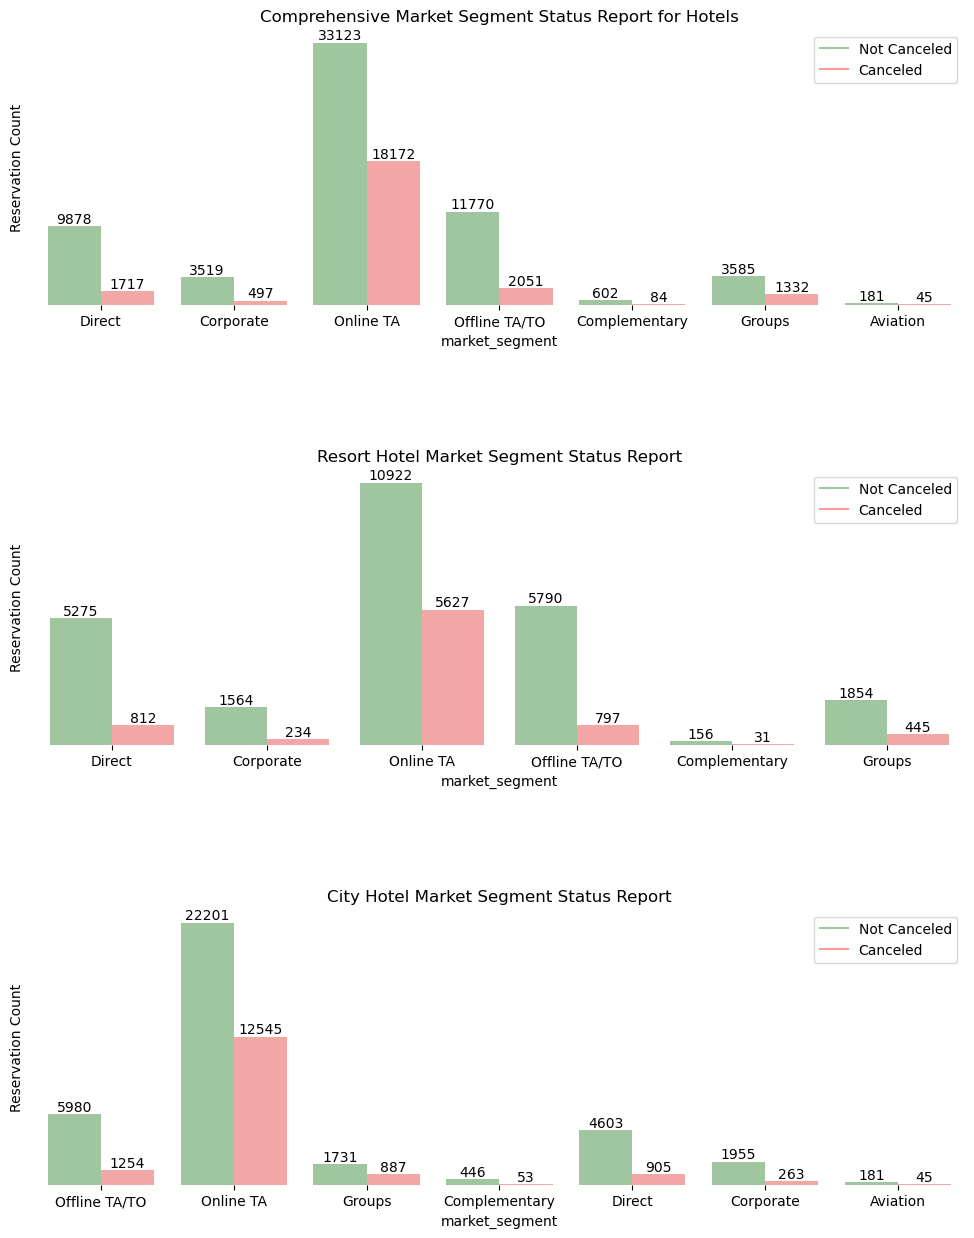

In [45]:
# Create figure and subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
 
# Set custom legend colors and labels
legend_colors = ["#99cc99", "#ff9999"]
legend_labels = ['Not Canceled', 'Canceled']
custom_legends = []
for i, color in enumerate(legend_colors):
    custom_legends.append(plt.Line2D([], [], color=color, label=legend_labels[i]))

# Function to remove box frame
def remove_box_frame(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Data and titles for each subplot
data = [bookings, resort_bookings, city_bookings]  
titles = ['Comprehensive Market Segment Status Report for Hotels', 'Resort Hotel Market Segment Status Report', 'City Hotel Market Segment Status Report']  

# Iterate over subplots
for i, ax in enumerate(axes):
    # Get the data for the current subplot
    current_data = data[i]  # Replace with the appropriate data for each subplot
    
    # Plot countplot
    sns.countplot(x=current_data['market_segment'], hue='is_canceled', data=current_data, palette=legend_colors, ax=ax)
    
    # Set title, legend, and y-axis label
    ax.set_title(titles[i])  # Set the title based on the corresponding title in the list
    ax.legend(handles=custom_legends)
    ax.set_ylabel('Reservation Count')
    
    # Remove y-axis ticks and box frame
    ax.set_yticks([])
    remove_box_frame(ax)
    
    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.6)

# Display the plot
plt.show()

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Observation:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li style="margin-bottom: 10px;">The market segments in the overall reservation status are dominated by Online Travel Agencies (OTA) with 51,295 bookings, followed by Offline Travel Agencies/Tour Operators (13,821 bookings), and Direct bookings (11,595 bookings). Groups, Corporate, Complementary, and Aviation segments have comparatively smaller counts.</li>
  <li style="margin-bottom: 10px;">In the Resort Hotel, the most common market segment for cancellations is Online TA with 5,627 cancellations, followed by Direct bookings with 812 cancellations. Offline TA/TO, Groups, Corporate, and Complementary segments also contribute to the cancellation.</li> 
  <li style="margin-bottom: 10px;">In the City Hotel, Online TA is again the dominant market segment for cancellations with 12,545 cancellations. Offline TA/TO and Direct bookings also have notable cancellation counts, while Groups, Corporate, Complementary, and Aviation segments contribute to a lesser extent.</li> 
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Insights:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li style="margin-bottom: 10px;">Online Travel Agencies (OTA) are the most significant market segment in overall reservation status, which includes both Resort and City Hotels.</li>
  <li style="margin-bottom: 10px;">Direct bookings have a considerable presence in the overall reservation status but are less prominent in City Hotels. This suggests that direct bookings are relatively more stable and less likely to be cancelled compared to bookings through OTAs or offline agencies.</li> 
  <li style="margin-bottom: 10px;">The Group segment has notable representation in the overall reservation status, indicating that group bookings are a significant source of business for hotels. However, the Group segment has a relatively lower cancellation count compared to other segments, suggesting that group bookings are generally more reliable and less likely to be cancelled.</li> 
  <li style="margin-bottom: 10px;">The Corporate segment is also present in the overall reservation status. This implies that business travelers form a substantial portion of hotel bookings, but cancellations in this segment can occur.</li> 
  <li style="margin-bottom: 10px;">The Complementary and Aviation segments have relatively lower counts in the overall reservation status. This suggests that these segments are specialized and represent a smaller portion of the hotel market, with fewer cancellations.</li> 
</ul>



<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Lead Time:</h2>
<p>Number of days that elapsed between the entering date of the booking into the PMS and the arrival date</p>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>City Hotel</li>
  <li>Resort Hotel </li>
</ul>

In [46]:
# Group the data by cancellation status
successful = bookings[bookings['is_canceled'] == 0]
canceled = bookings[bookings['is_canceled'] == 1]

# Create histogram traces for not canceled and canceled bookings
trace_successful = go.Histogram(x=successful['lead_time'], nbinsx=30, name='Successful')
trace_canceled = go.Histogram(x=canceled['lead_time'], nbinsx=30, name='Canceled')

# Create the layout
layout = go.Layout(
    title='Reservation Status by Lead Time',
    xaxis=dict(title='Lead Time'),
    yaxis=dict(title='Reservation Count'),
    barmode='overlay',
    bargap=0.1
)

# Create the figure and plot
data = [trace_successful, trace_canceled]
fig = go.Figure(data=data, layout=layout)
fig.show()

In [47]:
# Group the data by cancellation status
resort_successful = resort_bookings[resort_bookings['is_canceled'] == 0]
resort_canceled = resort_bookings[resort_bookings['is_canceled'] == 1]

city_sucessful = city_bookings[city_bookings['is_canceled'] == 0]
city_canceled = city_bookings[city_bookings['is_canceled'] == 1]

# Calculate the bin edges for lead time
lead_time_min = min(resort_successful['lead_time'].min(), resort_canceled['lead_time'].min())
lead_time_max = max(resort_successful['lead_time'].max(), resort_canceled['lead_time'].max())
bins = np.linspace(lead_time_min, lead_time_max, num=30)

# Create the subplots with 2 rows and 1 column
fig = sp.make_subplots(rows=2, cols=1)

# Create histogram trace 
trace_resort_successful = go.Histogram(x=resort_successful['lead_time'], nbinsx=4, name='Resort Sucessful')
fig.add_trace(trace_resort_successful, row=1, col=1)

trace_resort_canceled = go.Histogram(x=resort_canceled['lead_time'], nbinsx=4, name='Resort Canceled')
fig.add_trace(trace_resort_canceled, row=1, col=1)

# Create histogram trace 
trace_city_successful = go.Histogram(x=city_sucessful['lead_time'], nbinsx=4, name='City Sucessful')
fig.add_trace(trace_city_successful, row=2, col=1)

trace_city_canceled = go.Histogram(x=city_canceled['lead_time'], nbinsx=4, name='City Canceled')
fig.add_trace(trace_city_canceled, row=2, col=1)

# Set labels and title for each subplot
fig.update_xaxes(title_text='Lead Time', row=1, col=1)
fig.update_yaxes(title_text='Reservation Count', row=1, col=1, ticks='')

fig.update_xaxes(title_text='Lead Time', row=2, col=1)
fig.update_yaxes(title_text='Reservation Count', row=2, col=1)

# Add custom annotations for legends
fig.add_annotation(x=0.5, y=1.1, xref='paper', yref='paper', text='<b><span style="font-size:18px">Resort Reservations by Lead Time</span></b>', showarrow=False)
fig.add_annotation(x=0.5, y=0.47, xref='paper', yref='paper', text='<b><span style="font-size:18px">City Reservations by Lead Time</span></b>', showarrow=False)

# Specify width and height
fig.update_layout(width=1000, height=900,barmode='overlay',
    bargap=0.1,
    showlegend=True)

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Observation:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li style="margin-bottom: 10px;">Cancellation rates are inversely correlated with lead time, meaning that when lead time is low, cancellation rates tend to be high.</li>
  <li style="margin-bottom: 10px;">However, as lead time increases, cancellation rates tend to decrease.</li> 
  <li style="margin-bottom: 10px;"> Additionally, it is worth noting that the ratio between successful bookings and cancellations also tends to decrease as lead time increases.</li> 
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Insights:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>While Lead Time may influence cancellations to some extent, the data does not show a strong correlation between Lead Time and the number of cancellations.</li>
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Deposit Type:</h2>
<p>Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: 
    <ul style="font-family: Arial, sans-serif; font-size: 13px; color: #556;">
      <li>No Deposit – no deposit was made.</li>
      <li>Non Refund – a deposit was made in the value of the total stay cost.</li>
      <li>Refundable – a deposit was made with a value under the total cost of stay.</li>
    </ul>
   </p>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>City Hotel</li>
  <li>Resort Hotel </li>
</ul>

In [48]:
cancl_deposit = bookings[bookings['is_canceled']==1]['deposit_type'].value_counts().reset_index()
cancl_deposit.columns = ['deposit_type', 'count']

sucessful_deposit = bookings[bookings['is_canceled']==0]['deposit_type'].value_counts().reset_index()
sucessful_deposit.columns = ['deposit_type', 'count']

In [49]:
resort_cancl_deposit = resort_bookings[resort_bookings['is_canceled']==1]['deposit_type'].value_counts().reset_index()
resort_cancl_deposit.columns = ['deposit_type', 'count']

resort_sucessful_deposit = resort_bookings[resort_bookings['is_canceled']==0]['deposit_type'].value_counts().reset_index()
resort_sucessful_deposit.columns = ['deposit_type', 'count']

city_cancl_deposit = city_bookings[city_bookings['is_canceled']==1]['deposit_type'].value_counts().reset_index()
city_cancl_deposit.columns = ['deposit_type', 'count']

city_sucessful_deposit = city_bookings[city_bookings['is_canceled']==0]['deposit_type'].value_counts().reset_index()
city_sucessful_deposit.columns = ['deposit_type', 'count']

In [50]:
# Create a countplot
fig = go.Figure(data=[go.Bar(x=cancl_deposit['deposit_type'], y=cancl_deposit['count'], name='Cancellation Deposit Type', marker_color='red'),
                      go.Bar(x=sucessful_deposit['deposit_type'], y=sucessful_deposit['count'], name='Successful Deposit Type', marker_color='blue')],
                layout=go.Layout(title='Hotel Reservation Cancellation Report: Deposit Type'))

fig.update_traces(textfont_size=10)
fig.update_layout(height=600, autosize=True, plot_bgcolor='rgb(275, 275, 275)')

fig.show()

In [51]:
from plotly.subplots import make_subplots

# Create the figure and subplot layout
fig = make_subplots(rows=2, cols=1)
# resort_cancl_deposit resort_sucessful_deposit city_cancl_deposit city_sucessful_deposit
# Add the countplot to the first subplot
fig.add_trace(go.Bar(x=resort_cancl_deposit['deposit_type'], y=resort_cancl_deposit['count'],
                     name='Resort Cancellation Deposit Type', marker_color='red'), row=1, col=1)
fig.add_trace(go.Bar(x=resort_sucessful_deposit['deposit_type'], y=resort_sucessful_deposit['count'],
                     name='Resort Successful Deposit Type', marker_color='blue'), row=1, col=1)

# Add the countplot to the second subplot
fig.add_trace(go.Bar(x=city_cancl_deposit['deposit_type'], y=city_cancl_deposit['count'],
                     name='City Cancellation Deposit Type', marker_color='red'), row=2, col=1)
fig.add_trace(go.Bar(x=city_sucessful_deposit['deposit_type'], y=city_sucessful_deposit['count'],
                     name='City Successful Deposit Type', marker_color='blue'), row=2, col=1)

# Update the figure layout
fig.update_traces(textfont_size=10)
fig.update_layout(height=800, autosize=True, plot_bgcolor='rgb(275, 275, 275)')

# Show the figure
fig.show()

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Observation:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>No Deposit experiences the highest rate of cancellations; however, it also garners the largest number of bookings, with a significant portion of them resulting in successful reservations. </li>
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Insights:</h2>

<p style="font-family: Helvetica, Arial, sans-serif; font-size: 16px; text-align: justify; color: #555;">Due to the lack of commitment associated with "no deposit" bookings, they often result in a higher rate of cancellations. To address this, it is crucial to focus on increasing bookings in both the non-refundable and refundable categories. Consider implementing the following strategies to achieve this goal:</li>
   <ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
      <li>Non Refund :
        <ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
          <li>Offer enticing incentives like discounted rates or complimentary upgrades.</li>
          <li>Create a sense of urgency with limited-time offers.</li>
        </ul>
       </li>
      <li>Refundable : 
       <ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
          <li>Provide partial refunds and coupons for cancellations.</li>
          <li>Clearly communicate the refund policy and offer flexible date changes.</li>
        </ul>
       </li>
      <li>Targeted promotions :
       <ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
          <li>Tailor marketing efforts to highlight the advantages of each booking type.</li>
          <li>Showcase unique features and experiences to attract guests.</li>
        </ul>
      </li>
   </ul>   
</p>
<p style="font-family: Helvetica, Arial, sans-serif; font-size: 16px; text-align: justify; color: #555;">Continuously monitor and evaluate the effectiveness of these strategies, making necessary adjustments to optimize booking conversions and drive increased revenue for your business.</p>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 24px; font-weight: bold; text-align: center; color: #555;">Proposals to effectively mitigate the cancellation rate</h2>
<ul style="font-family: Arial, sans-serif; font-size: 18px; color: #555;">
  <li style="margin-bottom: 10px;">The increase in cancellation rates correlates with the rise in price rates. To mitigate reservation cancellations, hotels should focus on refining their pricing strategy by implementing targeted rate reductions for specific properties based on their respective locations. Additionally, providing consumer discounts can be an effective approach to discourage cancellations and foster customer satisfaction.</li>
   <li style="margin-bottom: 10px;">Online Travel Agencies (OTAs) dominate the reservation market but face high cancellation rates. A potential mismatches between online hotel presence and the actual experience can lead to high cancellation. To mitigate this, introducing methods like discounts and other incentives, to enhance customer satisfaction and align expectations with the reality of the hotel experience.</li>
   <li style="margin-bottom: 10px;">During the period from January to July, hotels have the opportunity to strategically implement targeted marketing campaigns aimed at maximizing revenue, considering that these months typically witness higher cancellation rates. By investing a reasonable amount into promotional efforts, hotels can effectively address this challenge and drive increased bookings and occupancy.</li>
   <li style="margin-bottom: 10px;">In order to effectively mitigate the cancellation rate mainly in Portugal,  hotels should focus on improving their overall quality and services while considering the local values. Offering discounts and incentives aligned with customer preferences can also be effective.</li>
</ul>